**UNIVERSIDADE DE SÃO PAULO**<br>
**MBA DATA SCIENCE & ANALYTICS USP/ESALQ**<br>
**ÁRVORES, REDES E ENSEMBLE MODELS**<br>
**Prof. João Fernando Serrajordia Rocha de Melo**<br>
Aluna: Luiza Batista Laquini<br>
Turma: DSA 241<br>

*coding: utf-8*

In [46]:
# Importações necessárias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet

from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from funcoes_ajuda import descritiva, relatorio_missing

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [47]:
# Carregar os dados
titanic = sns.load_dataset('data/titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [49]:
#  Análise descritiva básica
for variavel in titanic.columns:
    print(f'\n\nAnálise univariada de {variavel}:')
    print(titanic[variavel].describe())



Análise univariada de survived:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


Análise univariada de pclass:
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


Análise univariada de sex:
count      891
unique       2
top       male
freq       577
Name: sex, dtype: object


Análise univariada de age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


Análise univariada de sibsp:
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


Anál

In [50]:
for variavel in ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 
                 'adult_male', 'deck', 'embark_town', 'alive', 'alone']:
    print(f'\n\nFrequencias da variável: {variavel}')
    print(titanic[variavel].value_counts(dropna=False).sort_index())



Frequencias da variável: pclass
pclass
1    216
2    184
3    491
Name: count, dtype: int64


Frequencias da variável: sex
sex
female    314
male      577
Name: count, dtype: int64


Frequencias da variável: sibsp
sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


Frequencias da variável: parch
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


Frequencias da variável: embarked
embarked
C      168
Q       77
S      644
NaN      2
Name: count, dtype: int64


Frequencias da variável: class
class
First     216
Second    184
Third     491
Name: count, dtype: int64


Frequencias da variável: who
who
child     83
man      537
woman    271
Name: count, dtype: int64


Frequencias da variável: adult_male
adult_male
False    354
True     537
Name: count, dtype: int64


Frequencias da variável: deck
deck
A       15
B       47
C       59
D       33
E       32
F       13
G        4
NaN    688
Name: count, 

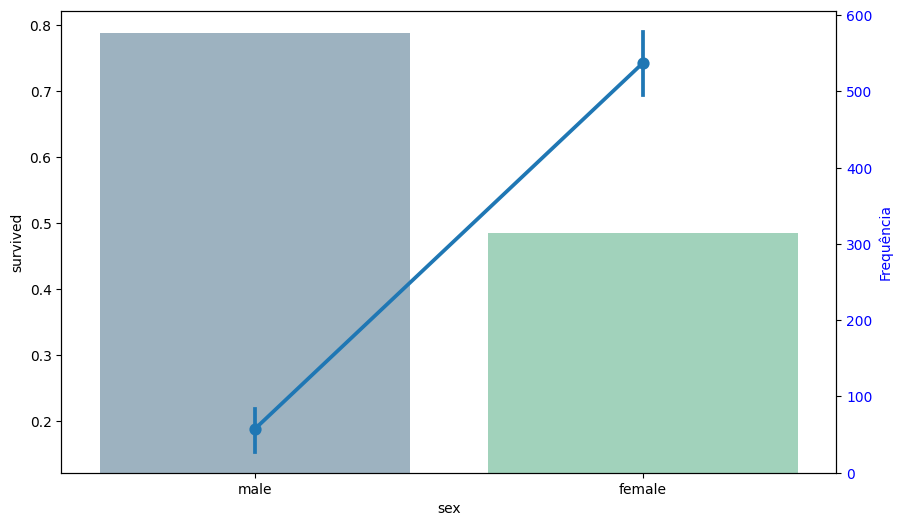

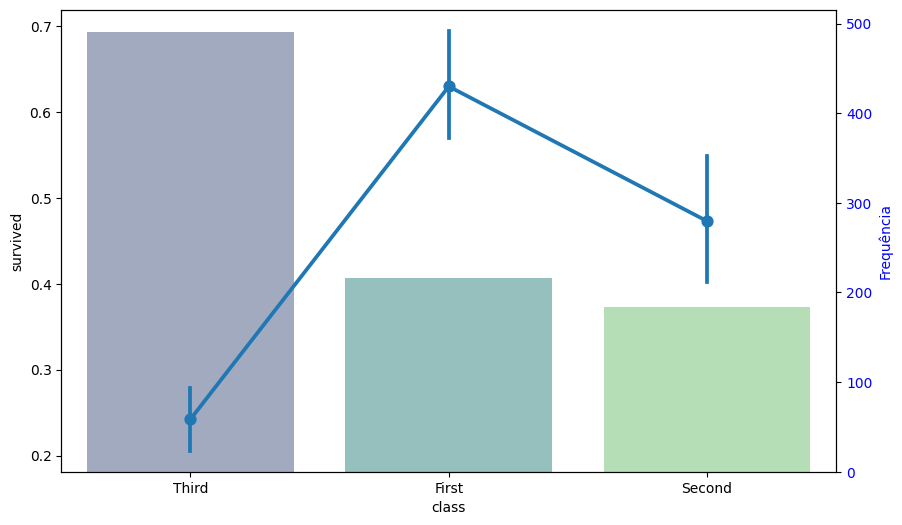

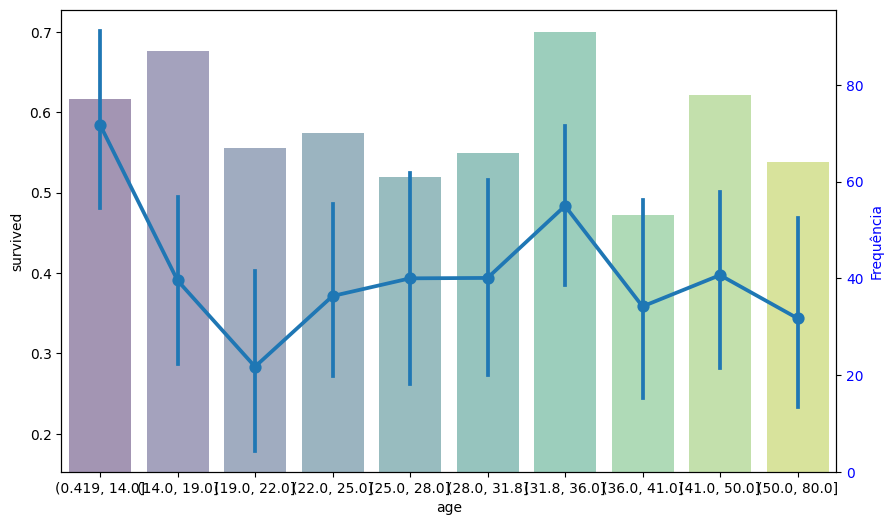

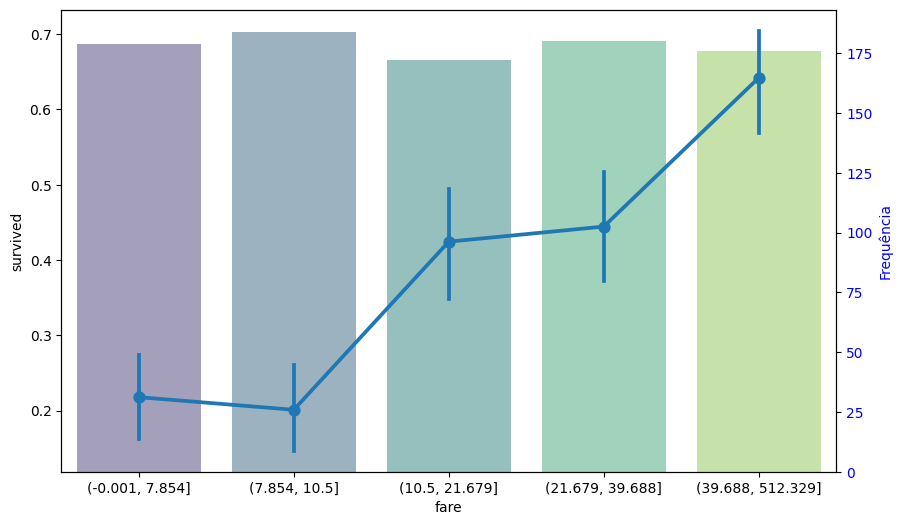

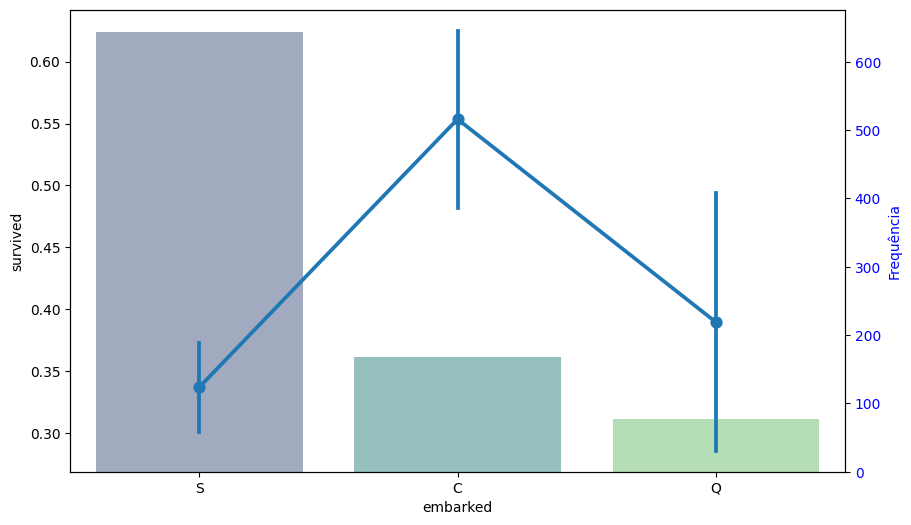

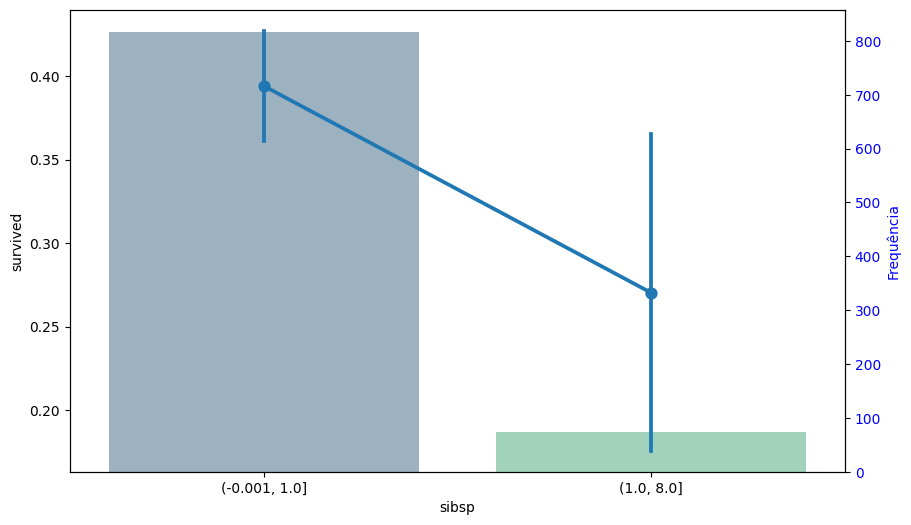

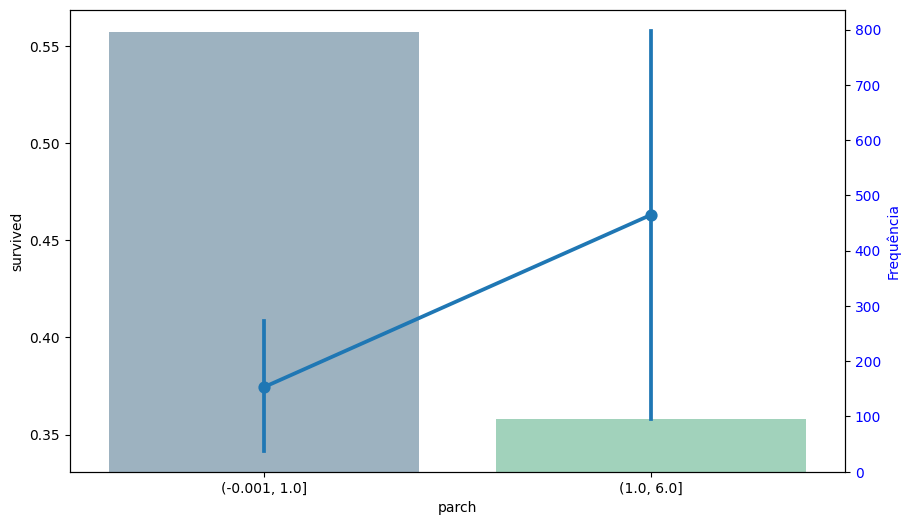

In [51]:
descritiva(titanic, "sex")
descritiva(titanic, "class")
descritiva(titanic, "age", max_classes=10)
descritiva(titanic, "fare", max_classes=5)
descritiva(titanic,"embarked")
descritiva(titanic,"sibsp")
descritiva(titanic,"parch")

In [52]:
# Avaliar dados faltantes

# A função tem basicamenteum compilado desses comandos:
# titanic.isna().sum()
# titanic.isna().mean().apply(lambda x: f"{x:.1%}".)
relatorio_missing(titanic)

Número de linhas: 891 | Número de colunas: 15


,Pct_missing,Freq_missing
survived,0.0%,0
pclass,0.0%,0
sex,0.0%,0
age,19.9%,177
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
embarked,0.2%,2
class,0.0%,0
who,0.0%,0


In [53]:
# Tratar variável age
titanic['age'] = titanic.age.fillna(titanic.age.mean())

In [54]:
# Remover variáveis redundantes
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 
                      'alive', 'alone'], inplace=True)

# Verificar variáveis string
metadados = titanic.dtypes

print('\nVariávels string:')
print(metadados[metadados == 'object'])


Variávels string:
sex         object
embarked    object
dtype: object


In [55]:
metadados

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [56]:
# Transformar variáveis string em dummies

# No pandas, um método prático de fazer isto é com o get_dummies
titanic_dummies = pd.get_dummies(titanic, drop_first=True)

# Conferir a estrutura da tabela
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [57]:
# Checar primeiras 3 linhas
titanic_dummies.head(3)

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True


In [58]:
# Salvando a base tratada

# O pkl é um formato do Python, que vai manter todas as propriedades do objeto
titanic_dummies.to_pickle('data/titanic1.pkl')
# Parquet é um formato popular, eficiente, compatível com outras plataformas
titanic_dummies.to_parquet('data/titanic1.parquet', engine='fastparquet')

In [59]:
#  Rodando a primeira árvore

# No Scikitlearn, vamos usar a seguinte estrutura:
    
# Um objeto X com as variáveis explicativas (miúsculo por serem várias)
X = titanic_dummies.drop(columns = ['survived'])
# Um objeto y com a variável resposta (target) minúsculo por ser só 1
y = titanic_dummies['survived']

# Estanciar a classe da árvore de decisão em um objeto chamado arvore
# Este objeto não possui os dados em um primeiro momento
# Mas ela possui todos os atributos e métodos que precisaremos
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)

In [60]:
# Treinar o modelo com o método .fit(). Aqui processamos os dados!
arvore.fit(X, y)

# OBS: O objeto árvore contémodos os atributos e métodos que precisamos
# Vamos usar esse objeto para várias coisas como:
#    visualizar as regras da árvore, avaliar a árvore, classificar novas linhas

DecisionTreeClassifier(max_depth=3, random_state=42)

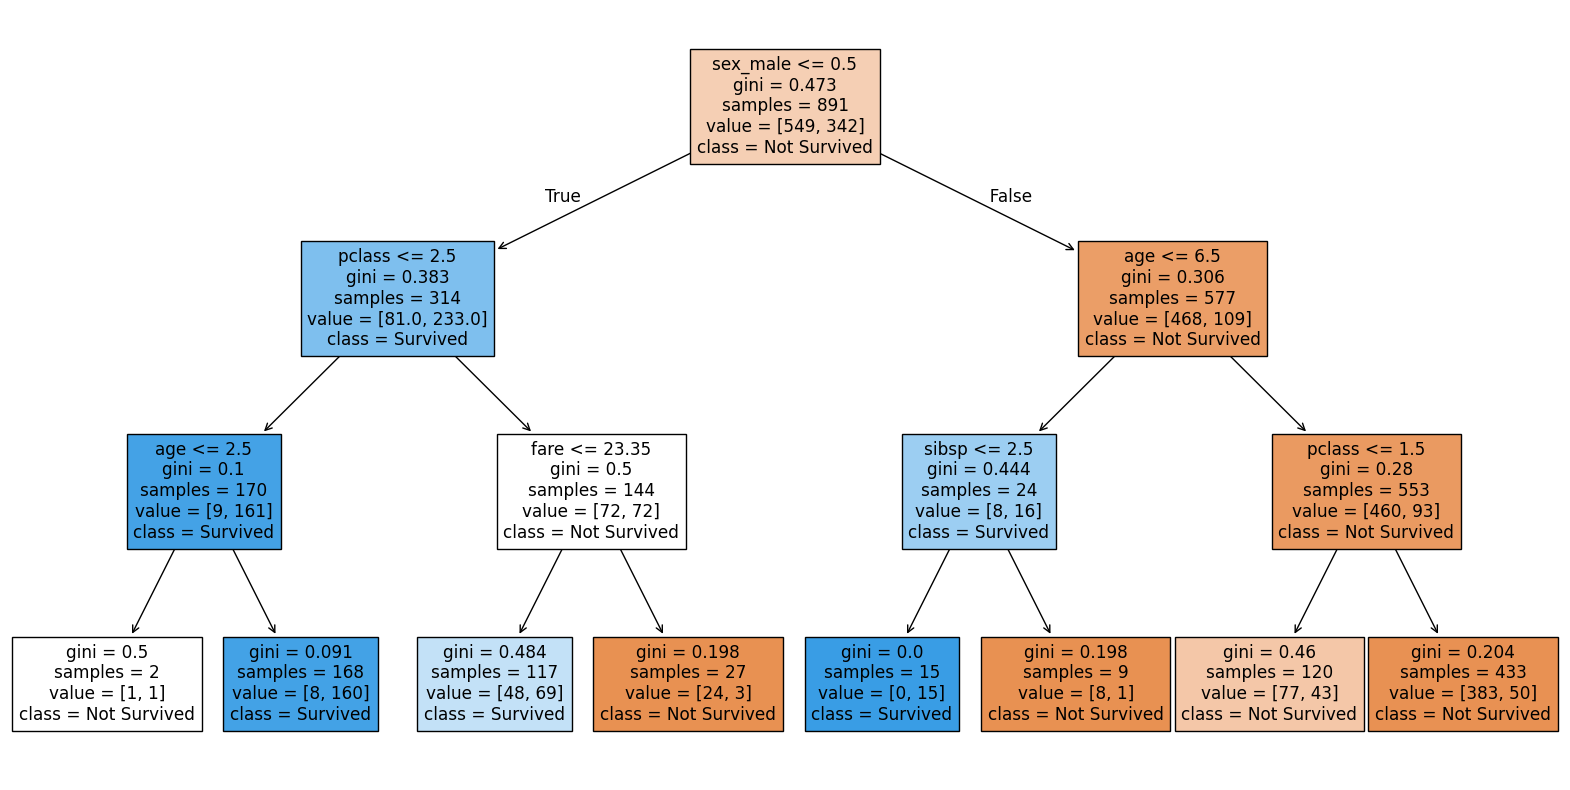

In [61]:
#  Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(arvore, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [63]:
#  Novos dados

# Suponha que temos novos dados para classificar
novos_dados = X.tail() # como exemplo, vamos classificar as 5 últimas linhas
novos_dados

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
886,2,27.000000,0,0,13.00,True,False,True
887,1,19.000000,0,0,30.00,False,False,True
888,3,29.699118,1,2,23.45,False,False,True
889,1,26.000000,0,0,30.00,True,False,False
890,3,32.000000,0,0,7.75,True,True,False


In [64]:
#  Classificando com a árvore

# Predict é o método que classifica as novas observações
#    Lembrete: a classificação é pela classe mais frequente da folha
classificação_novos_dados = arvore.predict(novos_dados)
classificação_novos_dados

array([0, 1, 0, 0, 0])

In [67]:
#  Avaliando a classificação
# Vamos comparar a classificação da árvore com o valor observado

# Guardar a classificação da árvore 
classificação_treino = arvore.predict(X)

# Comparar com os valores reais por uma tabela cruzada
print(pd.crosstab(classificação_treino, y, margins=True))
print(pd.crosstab(classificação_treino, y, normalize='index'))
print(pd.crosstab(classificação_treino, y, normalize='columns'))

survived    0    1  All
row_0                  
0         493   98  591
1          56  244  300
All       549  342  891
survived         0         1
row_0                       
0         0.834179  0.165821
1         0.186667  0.813333
survived         0        1
row_0                      
0         0.897996  0.28655
1         0.102004  0.71345


In [68]:
acertos = classificação_treino == y
pct_acertos = acertos.sum()/acertos.shape[0]
print(f'Acurácia (taxa de acerto): {pct_acertos:.2%}')

Acurácia (taxa de acerto): 82.72%


In [69]:
# Calculando acurácia e matriz de confusão

# Vamos avaliar o modelo com algumas funções próprias do Scikit-Learn
# A função confudion_matrix faz basicamente a comparação acima
cm = confusion_matrix(y, arvore.predict(X))
# accuracy_score calcula o percentual de acertos
ac = accuracy_score(y, arvore.predict(X))
# Essa função pondera para forçar a distribuição da target como uniforme
bac = balanced_accuracy_score(y, arvore.predict(X))

print(f'\nA acurácia da árvore é: {ac:.1%}')
print(f'A acurácia balanceada da árvore é: {bac:.1%}')


A acurácia da árvore é: 82.7%
A acurácia balanceada da árvore é: 80.6%


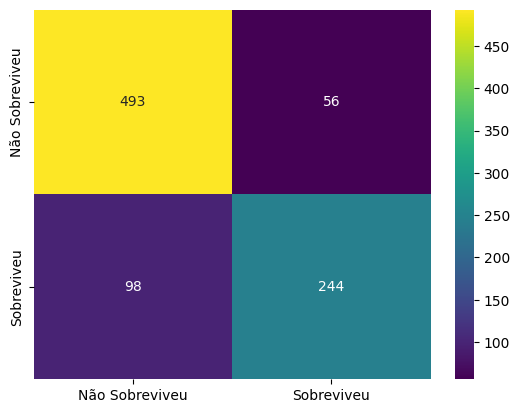

In [70]:
# Visualização gráfica
sns.heatmap(cm, 
            annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

In [71]:
# Relatório de classificação do Scikit
print('\n', classification_report(y, arvore.predict(X)))


               precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891

